**Sales Prediction Dataset**

---


The dataset provided contains information about the advertising expenditures of a company on various platforms (TV, Radio, newspapers) and the corresponding sales of a product

In [1]:
#importing all the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_excel('/content/advertising_sales_data.xlsx')

In [4]:
any_missing = dataset.isnull().values.any()
print(any_missing)

True


In [5]:
#check for missing values and duplicates
missing_values = dataset.isnull().sum()
print("Missing values:\n", missing_values)
duplicates = dataset.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Missing values:
 Campaign     0
TV           0
Radio        2
Newspaper    0
Sales        0
dtype: int64
Number of duplicate rows: 0


In [6]:
#handle the missing values
radio_mean = dataset['Radio'].mean()
dataset['Radio'] = dataset['Radio'].fillna(radio_mean)
print("Missing values after filling:\n", dataset.isnull().sum())

Missing values after filling:
 Campaign     0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


1.	What is the average amount spent on TV advertising in the dataset? <br> Ans "-

average amount spend on TV advertising is :  147.0425
Average amount spent on radio advertising is: 23.26060606060606
Average amount spent on newspaper advertising is: 30.553999999999995


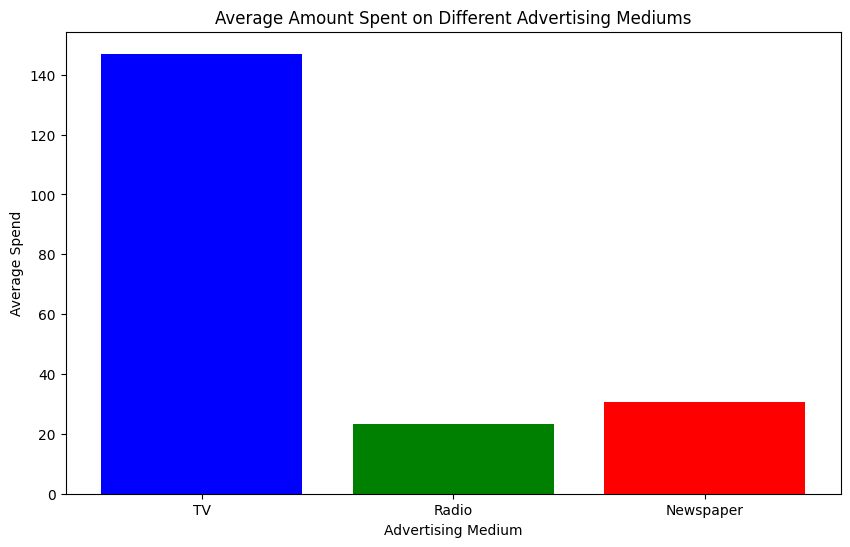

In [10]:
tv_avg_spend = dataset['TV'].mean()
print('average amount spend on TV advertising is : ',tv_avg_spend)

# radio_avg_spend = dataset['Radio'].mean()
# print('Average amount spent on radio advertising is:', radio_avg_spend)
# newspaper_avg_spend = dataset['Newspaper'].mean()
# print('Average amount spent on newspaper advertising is:', newspaper_avg_spend)
# categories = ['TV', 'Radio', 'Newspaper']
# averages = [tv_avg_spend, radio_avg_spend, newspaper_avg_spend]

# # Create a bar plot
# plt.figure(figsize=(10, 6))
# plt.bar(categories, averages, color=['blue', 'green', 'red'])
# plt.xlabel('Advertising Medium')
# plt.ylabel('Average Spend')
# plt.title('Average Amount Spent on Different Advertising Mediums')
# plt.show()


*2*.	What is the correlation between radio advertising expenditure and product sales? <br> Ans :-

correlation between radio advertising expenditure and product sales is :  0.3496507429302875


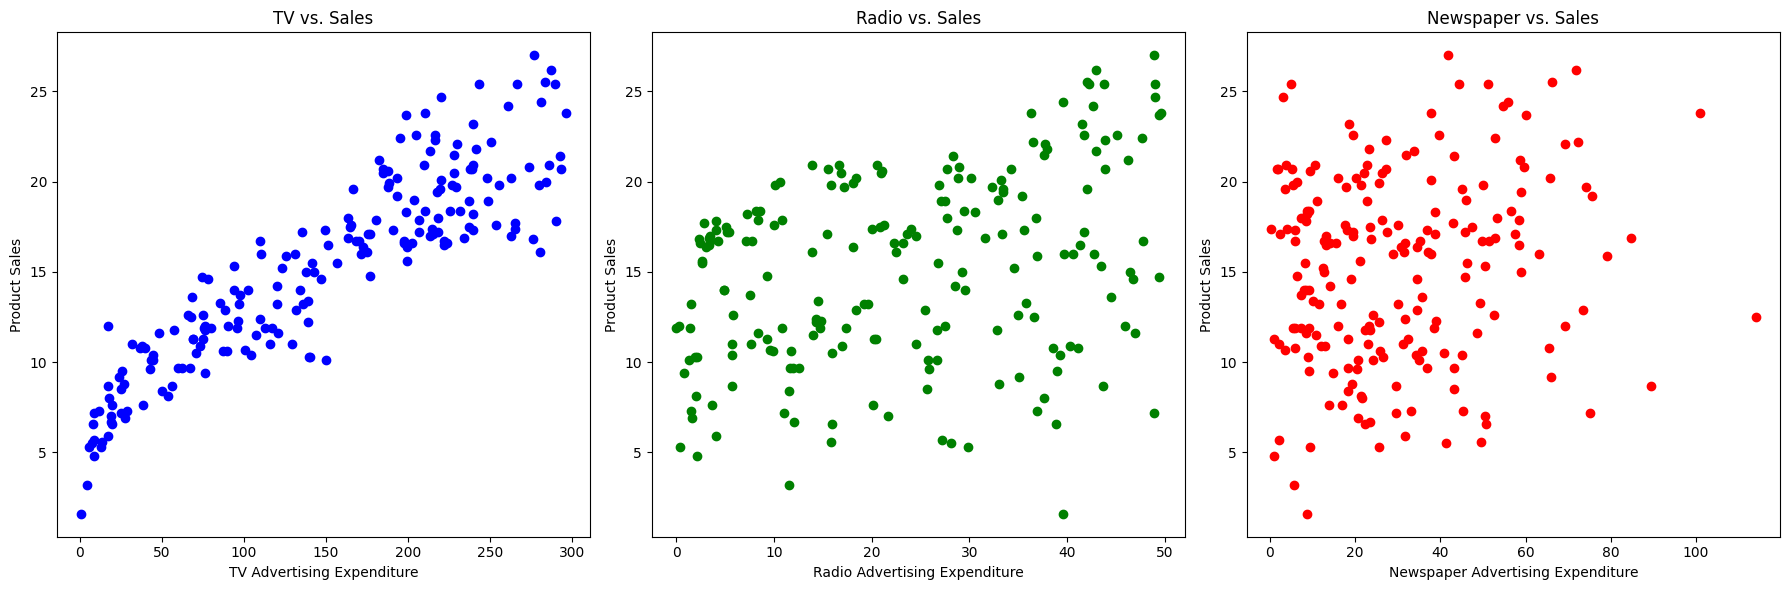

In [15]:
corr_radio_sales = dataset['Radio'].corr(dataset['Sales'])
print('correlation between radio advertising expenditure and product sales is : ',corr_radio_sales)

# plt.figure(figsize=(18, 6))

# # TV Advertising vs Sales
# plt.subplot(1, 3, 1)
# plt.scatter(dataset['TV'], dataset['Sales'], color='blue')
# plt.xlabel('TV Advertising Expenditure')
# plt.ylabel('Product Sales')
# plt.title(f'TV vs. Sales')

# # Radio Advertising vs Sales
# plt.subplot(1, 3, 2)
# plt.scatter(dataset['Radio'], dataset['Sales'], color='green')
# plt.xlabel('Radio Advertising Expenditure')
# plt.ylabel('Product Sales')
# plt.title(f'Radio vs. Sales')

# # Newspaper Advertising vs Sales
# plt.subplot(1, 3, 3)
# plt.scatter(dataset['Newspaper'], dataset['Sales'], color='red')
# plt.xlabel('Newspaper Advertising Expenditure')
# plt.ylabel('Product Sales')
# plt.title(f'Newspaper vs. Sales')

# plt.tight_layout()
# plt.show()


3.	Which advertising medium has the highest impact on sales based on the dataset? <br> Ans :-

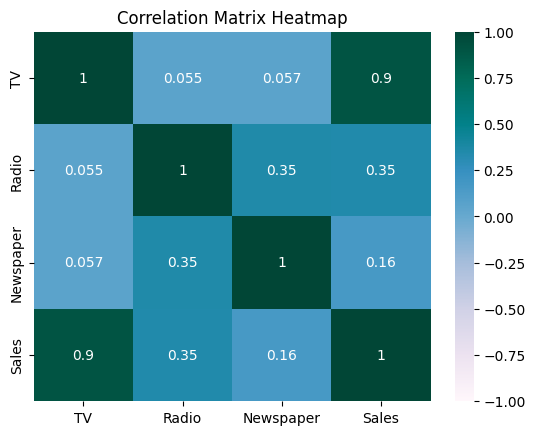

In [16]:
dataset_num = dataset.drop(columns=['Campaign'])
correlation_matrix = dataset_num.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='PuBuGn', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()


As evident from the seaborn heatmap, TV has the highest impact on sales figure with a correlation score of 0.9 which suggests strong correlation.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = dataset[['TV', 'Radio', 'Newspaper']]
y = dataset['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# New advertising expenditures: $200 on TV, $40 on Radio, and $50 on Newspaper
new_data = [[200, 40, 50]]

# Predict sales using the trained model
predicted_sales = model.predict(new_data)

print("Predicted Sales:", predicted_sales[0])


Predicted Sales: 19.871049209206635


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


4.	Plot a linear regression line that includes all variables (TV, Radio, Newspaper) to predict Sales, and visualize the model's predictions against the actual sales values. <br> Ans :-

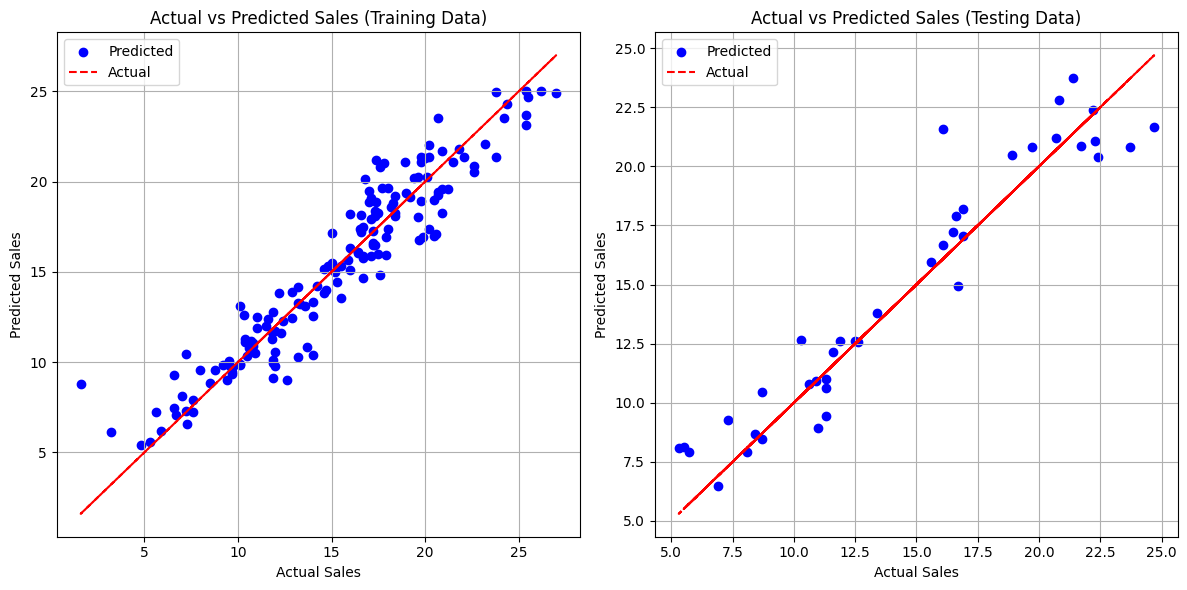

Mean Squared Error: 2.9074318865000555
R^2 Score: 0.9059117026092904


In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Plotting actual vs predicted values on training data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, train_predictions, color='blue', label='Predicted')
plt.plot(y_train, y_train, color='red', linestyle='--', label='Actual')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales (Training Data)')
plt.legend()
plt.grid(True)

# Plotting actual vs predicted values on testing data
plt.subplot(1, 2, 2)
plt.scatter(y_test, test_predictions, color='blue', label='Predicted')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Actual')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales (Testing Data)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Evaluate model performance
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


5.	How would sales be predicted for a new set of advertising expenditures: $200 on TV, $40 on Radio, and $50 on Newspaper? <br> Ans :-

In [ ]:
# New advertising expenditures: $200 on TV, $40 on Radio, and $50 on Newspaper
new_data = [[200, 40, 50]]

# Predict sales using the trained model
predicted_sales = model.predict(new_data)

print("Predicted Sales:", predicted_sales[0])



Predicted Sales: 19.871049209206635


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


6.	How does the performance of the linear regression model change when the dataset is normalized? <br> Ans :-

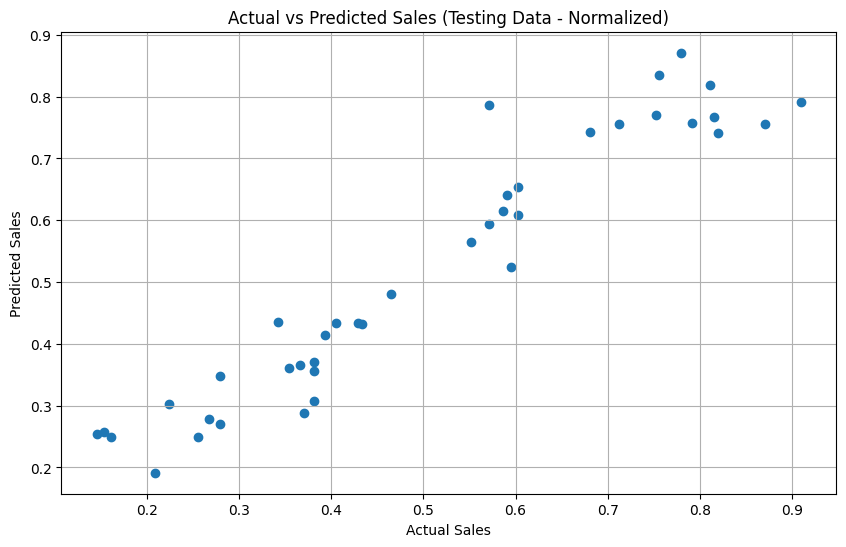

Mean Squared Error: 0.004506528437131963
R^2 Score: 0.9059117026092903


In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(dataset.iloc[:, 1:])

# Create a DataFrame with normalized features
normalized_df = pd.DataFrame(normalized_features, columns=dataset.columns[1:])

# Extracting features and target
X = normalized_df[['TV', 'Radio', 'Newspaper']]
y = normalized_df['Sales']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the multiple linear regression model on training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict sales values on testing data
predictions = model.predict(X_test)

# Plotting actual vs predicted values on testing data
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales (Testing Data - Normalized)')
plt.grid(True)
plt.show()

# Evaluate model performance
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


As we can observe after normalization the mean squared error reduceed. hence normalized data performs better and predicts sales better with respect to expenditures.

7.	What is the impact on the sales prediction when only radio and newspaper advertising expenditures are used as predictors? <br> Ans :-

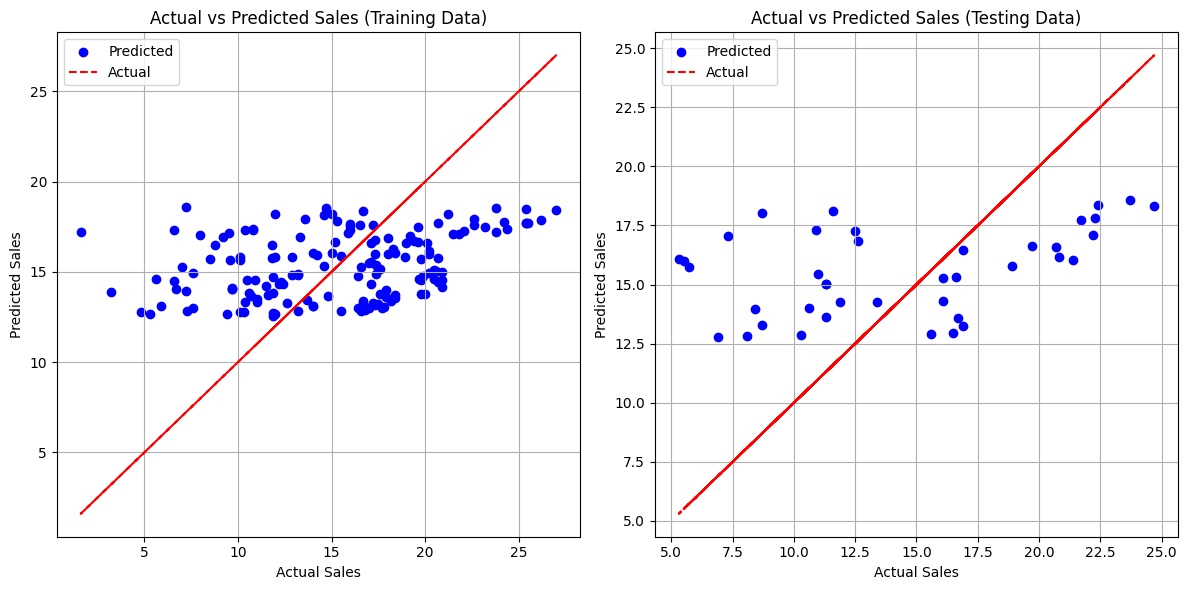

Mean Squared Error (Testing Data): 27.502400158082317
R^2 Score (Testing Data): 0.10998637077378093


In [ ]:
X = dataset[['Newspaper', 'Radio']]
y = dataset['Sales']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model on training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict sales values on training and testing data
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Plotting actual vs predicted values on training data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, train_predictions, color='blue', label='Predicted')
plt.plot(y_train, y_train, color='red', linestyle='--', label='Actual')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales (Training Data)')
plt.legend()
plt.grid(True)

# Plotting actual vs predicted values on testing data
plt.subplot(1, 2, 2)
plt.scatter(y_test, test_predictions, color='blue', label='Predicted')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Actual')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales (Testing Data)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Evaluate model performance
mse = mean_squared_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

print("Mean Squared Error (Testing Data):", mse)
print("R^2 Score (Testing Data):", r2)



High MSE indicates that the model's predictive accuracy has been impacted by excluding TV advertising expenditures. This increase in MSE suggests that TV advertising expenditures might have a substantial influence on sales prediction